In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#importing dataset
dataset=pd.read_csv(r"C:\Users\dell\Downloads\Polytropic\creditcard.csv")

FileNotFoundError: [Errno 2] File C:\Users\dell\Downloads\Polytropic\creditcard.csv does not exist: 'C:\\Users\\dell\\Downloads\\Polytropic\\creditcard.csv'

In [5]:
count = dataset["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#creating independent and dependent variables
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

In [7]:
#splitting the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =100)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
roc_values = []
for feature in X_train.columns:
    clf = LogisticRegression(random_state = 0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

V14       0.947390
V4        0.934162
V12       0.905615
V11       0.900123
V10       0.883501
V3        0.867750
V2        0.863985
V9        0.806234
V16       0.787911
V1        0.782833
V7        0.779464
V17       0.741434
V6        0.738309
V21       0.737536
V28       0.724389
V27       0.678740
V18       0.654314
V5        0.630856
V20       0.597388
Time      0.589582
V8        0.583634
V19       0.580343
V13       0.568057
V23       0.567339
V24       0.546917
V25       0.528033
V22       0.524580
V26       0.516695
V15       0.488263
Amount    0.416299
dtype: float64

In [10]:
roc_values.sort_values(ascending=False)

V14       0.947390
V4        0.934162
V12       0.905615
V11       0.900123
V10       0.883501
V3        0.867750
V2        0.863985
V9        0.806234
V16       0.787911
V1        0.782833
V7        0.779464
V17       0.741434
V6        0.738309
V21       0.737536
V28       0.724389
V27       0.678740
V18       0.654314
V5        0.630856
V20       0.597388
Time      0.589582
V8        0.583634
V19       0.580343
V13       0.568057
V23       0.567339
V24       0.546917
V25       0.528033
V22       0.524580
V26       0.516695
V15       0.488263
Amount    0.416299
dtype: float64

Text(0.5, 1.0, 'Univariate ROC-AUC')

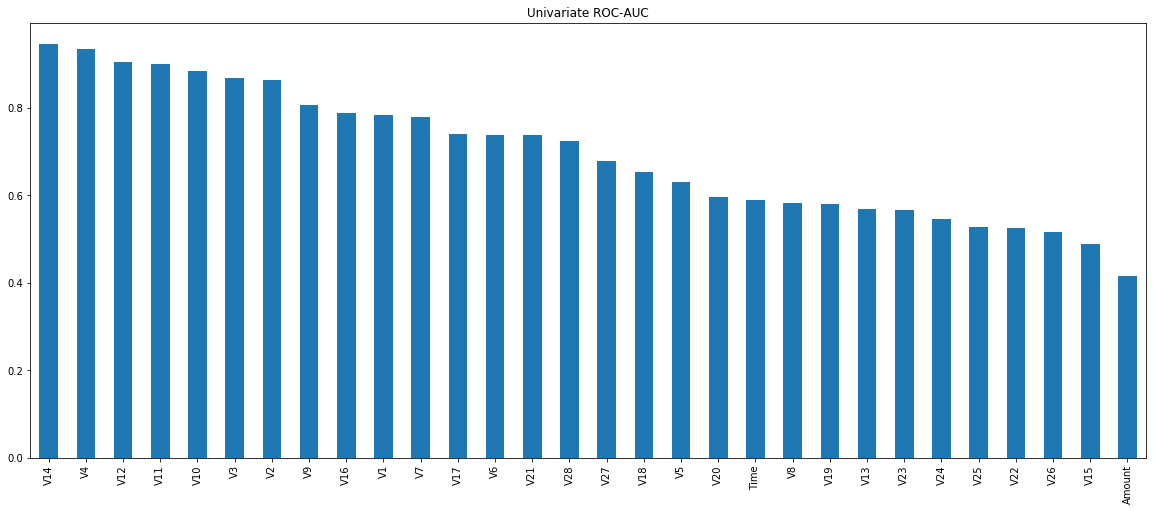

In [11]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title('Univariate ROC-AUC')

In [12]:
X_train = X_train.drop(['V22','Amount','V15','V26','V25'],axis='columns')
X_test = X_test.drop(['V22','Amount','V15','V26','V25'],axis='columns')

In [13]:
#feature scaling
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
X_train =poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [15]:
#training model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,C=0.01,penalty='l2',n_jobs = 8,solver='saga')
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=8, penalty='l2', random_state=0,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [16]:
#training model
y_pred = classifier.predict(X_test).reshape(-1,1)
y_pred1 = classifier.predict(X_train)

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None))
cm=confusion_matrix(y_test, classifier.predict(X_test))
CM=pd.DataFrame(cm)
sns.heatmap(CM, annot=True)
plt.show()

[[56865     1]
 [   88     8]]


NameError: name 'sns' is not defined

In [18]:
#predicting values
from sklearn.metrics import jaccard_similarity_score
print("Accuracy of train set : " + str(jaccard_similarity_score(y_train,y_pred1)))
print('Accuracy of test set : '+str(jaccard_similarity_score(y_test,y_pred)))

Accuracy of train set : 0.9984463121859158
Accuracy of test set : 0.9984375548611355


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.08      0.15        96

    accuracy                           1.00     56962
   macro avg       0.94      0.54      0.58     56962
weighted avg       1.00      1.00      1.00     56962



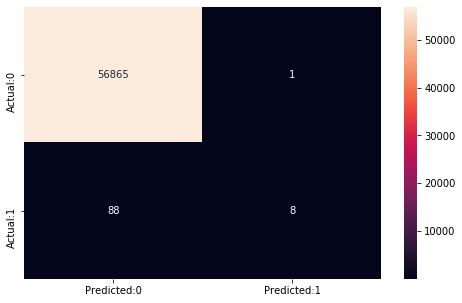

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))